# 飛行機の乗客数データ

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARIMA

In [3]:
import requests
import io

# 飛行機の乗客数データ(月ごと)
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))

<AxesSubplot:xlabel='Month'>

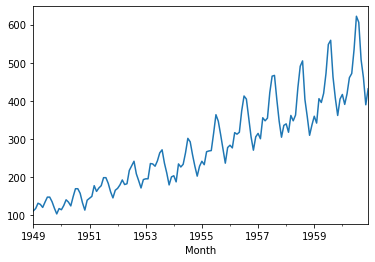

In [4]:
df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], 
                                     infer_datetime_format=True)
y = pd.Series(df_content["#Passengers"].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

変動の種類
<pre>
１. 傾向変動
２. 季節変動
３．不規則変動
<pre>

<ipython-input-7-1dd76ebb3b64>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(y, freq=12)


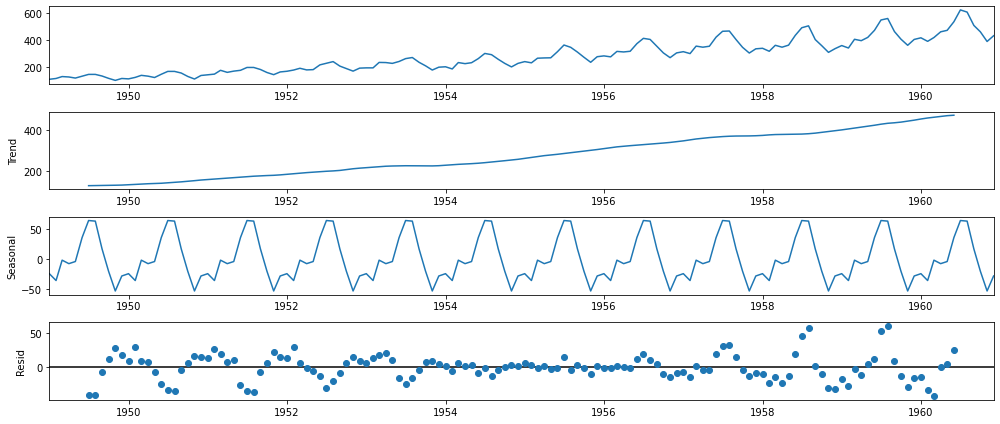

<Figure size 1200x400 with 0 Axes>

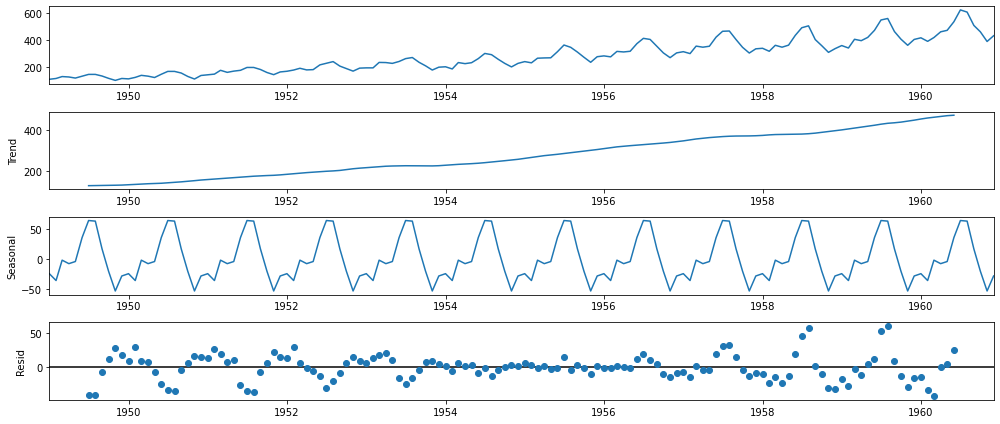

In [7]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(y, freq=12)

plt.rcParams["figure.figsize"] = (14, 6)
plt.figure(figsize=(24, 8), dpi=50)
res.plot()